# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# Create two new dataframes
north_df = pd.read_csv('data/NorthCallCenter.csv')
north_df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [2]:
south_df = pd.read_csv('data/SouthCallCenter.csv')
south_df

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [3]:
#Code Used:
len(north_df['Rep ID'].unique())

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [4]:
#Code Used:
len(south_df['Rep ID'].unique())

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [5]:
#Code Used:
north_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [6]:
north_df[['Busy Minutes' ,'Not Ready Minutes' , 'Incoming Wait Time' , 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [7]:
south_df.columns

Index(['Unnamed: 0', 'Branch', 'Call Purpose', 'Time Block',
       'Incoming or Outgoing', 'Queue', 'Rep ID', 'Sale', 'Lost Call',
       'Abandoned', 'Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time',
       'During Call Wait Time', 'Calls'],
      dtype='object')

In [8]:
#Code Used:
south_df[['Busy Minutes' , 'Not Ready Minutes' , 'Incoming Wait Time' , 'During Call Wait Time']].mean()


Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
north_df[['Time Block', 'Calls']].groupby('Time Block').sum()


,Calls
Time Block,
10:00 AM,43
11:00 AM,25
12:00 PM,45
1:00 PM,17
2:00 PM,35
3:00 PM,30
4:00 PM,28
5:00 PM,17
9:00 AM,5


In [10]:
south_df[['Time Block' , 'Calls']].groupby('Time Block').sum()

,Calls
Time Block,
10:00 AM,56
11:00 AM,31
12:00 PM,75
1:00 PM,23
2:00 PM,30
3:00 PM,43
4:00 PM,25
5:00 PM,26
9:00 AM,5


In [62]:
north_df['Calls'].sum()

245

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 10
> - Not Ready Minutes = 2
> - Incoming Wait Time = 3
> - During Call Wait Time = 3
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10
> - Not Ready Minutes = 2
> - Incoming Wait Time = 3
> - During Call Wait Time = 3
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 5
> - 10:00AM  = 56
> - 11:00AM  = 31
> - 12:00PM  = 75
> - 1:00PM   = 23
> - 2:00PM   = 30
> - 3:00PM   = 43
> - 4:00PM   = 25
> - 5:00PM   = 26



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: 
# I counted how many null values there were for each column and found there was 163 null values in the Incoming Wait Time column for north_df
# I would put the missing data at 0 because it is better than removing the rows and losing the data for incoming wait time

In [11]:
# Code Used 
# Add Additional Cells as needed.
# I counted how many null values there were for each column and found there was 163 null values in the Incoming Wait Time column for north_df
# I would put the missing data at 0 because it is better than removing the rows 
# and losing the data for incoming wait time

In [12]:
north_df.isnull().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [13]:
north_df.fillna(0, inplace=True)

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: 
#I found there was and extra YES value with a white space after and I used the .strip() function to remove the extra space

In [14]:
#Code Used
# Add Additional Cells as need

#I found there was and extra YES value with a white space after and I used the .strip()
# function to remove the extra space
    
    

In [15]:
north_df["Sale"].str.strip().unique()
north_df["Sale"] = north_df["Sale"].str.strip()
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

In [16]:
north_df.head(50)['Sale'].unique()

array(['NO', 'YES'], dtype=object)

In [17]:
north_df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: I did not find any duplicates

In [18]:
#Code Used
# Add Additional Cells as needed.
#False if not a duplicate. I used sum to find how many dups there are.  

In [19]:
south_df.duplicated().sum()

0

In [20]:
north_df.duplicated().sum()

0

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: 
# the unnamed column is an extra index, and useless. I will remove the Unnamed column

In [21]:
#Code Used
# Add Additional Cells as needed.
# the unnamed column is an extra index, and useless. I will remove the Unnamed column

In [22]:
north_df.drop('Unnamed: 0' , axis = 1)

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,0.0,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,0.0,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,0.0,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,0.0,2,1


In [23]:
south_df.drop(columns = 'Unnamed: 0' , inplace = True)

In [24]:
south_df

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [25]:
# Create dataframe for the entire company named df
df = pd.concat([north_df,south_df])
df



,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0.0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1.0,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2.0,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3.0,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4.0,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,NaN,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,NaN,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,NaN,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,NaN,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [26]:
df.reset_index(inplace = True)
df

,index,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,0.0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,1.0,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,2.0,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,3.0,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,4.0,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,NaN,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,NaN,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,NaN,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,NaN,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [27]:
df

,index,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,0.0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,1.0,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,2.0,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,3.0,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,4.0,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,NaN,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,NaN,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,NaN,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,NaN,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


In [28]:
df['Sale'].unique()

array(['NO', 'YES'], dtype=object)

In [29]:
## I needed these codes. They worked, but arent working now. Looks like df 
## is working. Want to keep these just incase. 
#df.fillna(0 , inplace =True)
#df['Sale'] = df['Sale'].str.strip()
#df.drop('index'


In [30]:
df

,index,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,0.0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,1.0,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,2.0,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,3.0,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,4.0,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,NaN,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,NaN,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,NaN,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,NaN,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent had the highest number of calls with a total of 37 calls
- South Branch = Eric had the highest number of calls with a total of 35 calls


In [31]:
df.groupby('Rep ID').sum()

,index,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Rep ID,,,,,,,,,
Alice,3637,0.0,0,0,199,46,15.0,58,20
Amanda,2666,2666.0,0,1,229,43,12.0,60,23
Andy,2494,2494.0,0,3,228,43,36.0,65,23
Brent,4840,4840.0,0,1,362,71,17.0,117,37
Cam,2746,2746.0,1,0,233,46,32.0,66,24
Duke,2999,2999.0,2,0,292,56,39.0,85,29
Eric,5039,0.0,0,0,361,54,47.0,112,35
George,4620,0.0,0,0,298,53,41.0,87,29
Helga,5236,0.0,0,2,292,58,36.0,95,31


In [32]:
north_df[['Calls' , 'Rep ID']].groupby('Rep ID').sum()

,Calls
Rep ID,
Amanda,23
Andy,23
Brent,37
Cam,24
Duke,29
Joe,26
Lilly,30
Todd,29
Xander,24


In [33]:
south_df[['Calls' , 'Rep ID']].groupby('Rep ID').sum()

,Calls
Rep ID,
Alice,20
Eric,35
George,29
Helga,31
Josh,26
Karl,28
Kate,29
Randy,33
Sandy,32


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.9%
- South Branch = 1.3%
- Company Wide = 2%
- Do any of these fall out of the optimal range of 2-5%? 
South_df has an abandoned percentage lower than the north_df and and the company as a whole. South_df seems to fall out the optimal range. 

In [34]:
# Code Used 
# Add Additional Cells as needed.
south_df['Abandoned'].mean()*100

1.2738853503184715

In [35]:
north_df['Abandoned'].mean()*100

2.857142857142857

In [36]:
df['Abandoned'].mean()*100

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch =  80.0%
- South Branch =  15.29%
- Company Wide =  43.65%

In [37]:
# Code Used
# Add Additional Cells as needed.
#north_df['Incoming Wait Time'].sort_values(column = 'Incoming Wait Time' , inplace = True)
df['Branch'].value_counts()

South    314
North    245
Name: Branch, dtype: int64

In [38]:
df[df['Incoming Wait Time'] <= 2].groupby(['Branch']).count()

,index,Unnamed: 0,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,,,,,,,,
North,196,196,196,196,196,196,196,196,196,196,196,196,196,196,196
South,48,0,48,48,48,48,48,48,48,48,48,48,48,48,48


In [39]:
244/559*100

43.64937388193202

In [40]:
south_df[south_df['Incoming Wait Time'] <=2].groupby(['Branch']).count()

,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,,,,,,
South,48,48,48,48,48,48,48,48,48,48,48,48,48


In [41]:
48/314*100

15.286624203821656

In [42]:
north_df[north_df['Incoming Wait Time'] <=2].groupby(['Branch']).count()

,Unnamed: 0,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Branch,,,,,,,,,,,,,,
North,196,196,196,196,196,196,196,196,196,196,196,196,196,196


In [43]:
196/245*100

80.0

In [44]:
#north_df[north_df['Incoming Wait Time'] <=2].groupby(['Branch']).sum()

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 1.02 
- South Branch in seconds = 3
- Company Wide in seconds = 1.70


In [45]:
# Code Used 
north_df['Incoming Wait Time'].mean()

1.0204081632653061

In [46]:
south_df['Incoming Wait Time'].mean()

3.0

In [47]:
df['Incoming Wait Time'].mean()

1.692722371967655

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I really like cyberpunk and bar charts. Cyberpunk is not boring and I think the colors are just visually pleasing and with the bar chart I am able to easily identify what I am trying to show. In this case, the abandonment rate per queue.

In [48]:
# Create visualization 1 here
# Import any additional libraries needed with alias
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
import mplcyberpunk 
style.use('cyberpunk')


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:
display(queue_dict)



,index,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,,,
A,11084,11084.0,1,4,946,181,116.0,272,96
B,18806,18806.0,4,3,1501,288,134.0,455,149
C,21602,0.0,4,1,1409,251,160.0,435,138
D,27539,0.0,7,3,1748,349,218.0,531,176


In [49]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

In [50]:
abandonment_df=pd.DataFrame.from_dict(abandonment_rates, orient='index', columns=['Rate'])

abandonment_df.reset_index(inplace=True)
abandonment_df.rename(columns={'index':'Queue'}, inplace=True)
abandonment_df

,Queue,Rate
0,A,0.041667
1,B,0.020134
2,C,0.007246
3,D,0.017045


Text(0.5, 1.0, 'Abandonment Rates per Queue')

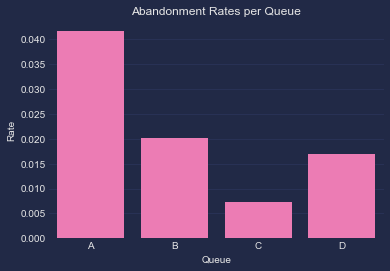

In [51]:
sb.barplot(x=abandonment_df['Queue'], y=abandonment_df['Rate'], color='hotpink')
plt.title('Abandonment Rates per Queue')

Text(0, 0.5, 'Abandonment Rate')

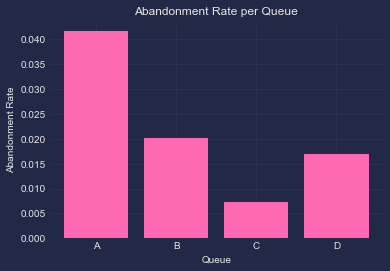

In [52]:

plt.bar(range(len(abandonment_rates)), list(abandonment_rates.values()), align='center',color='hotpink')
plt.xticks(range(len(abandonment_rates)), list(abandonment_rates.keys()))
plt.title('Abandonment Rate per Queue')
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate')

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: 
I really like cyberpunk and bar charts. Cyberpunk is not boring and I think the colors are just visually pleasing and with the bar chart I am able to easily identify what I am trying to show. In this case, the average speed of answer for each rep in the north branch. 

In [53]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

Text(0, 0.5, 'Average Speed of Answer')

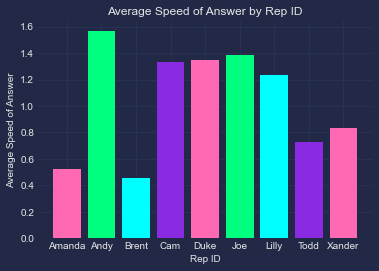

In [54]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
plt.bar(north_plt['Rep ID'], north_plt['Incoming Wait Time'], color = ['hotpink','springgreen', 'aqua', 'blueviolet'])
plt.title('Average Speed of Answer by Rep ID')
plt.xlabel('Rep ID')
plt.ylabel('Average Speed of Answer')

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: For this a bar chart is optimal. I decided on the horizontal because it was only comparing a few columns at a time. Again, I went with cyberpunk because I find it to be most aesthetically pleasing

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


([<matplotlib.axis.YTick at 0x1c69893adf0>,
 [Text(0, 0, 'Outgoing'), Text(0, 1, 'Incoming')])

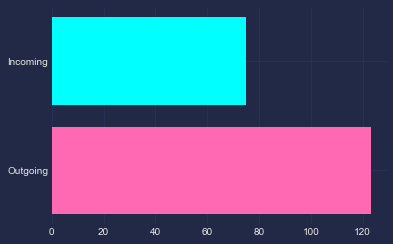

In [55]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()


#Your Code Here:
plt.barh(range(len(complaints)), list(complaints.values()), align='center',color='hotpink')
plt.yticks(range(len(complaints)), list(complaints.keys()))
plt.show

plt.barh(range(len(sales_support)), list(sales_support.values()), align='center',color=['hotpink','cyan'])
plt.yticks(range(len(sales_support)), list(sales_support.keys()))



In [56]:
outgoing_plus={'Outgoing':0}
complaints.update(outgoing_plus)
complaints

{'Incoming': 51, 'Outgoing': 0}

([<matplotlib.axis.YTick at 0x1c698996970>,
 [Text(0, 0, 'Incoming'), Text(0, 1, 'Outgoing')])

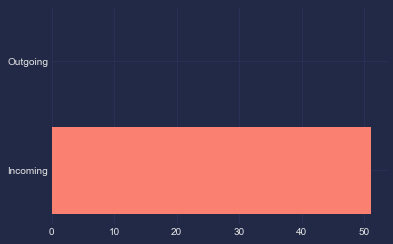

In [57]:
plt.barh(range(len(complaints)), list(complaints.values()), align='center',color=['salmon'])
plt.yticks(range(len(complaints)), list(complaints.keys()))

([<matplotlib.axis.YTick at 0x1c6989ea610>,
 [Text(0, 0, 'Outgoing'), Text(0, 1, 'Incoming')])

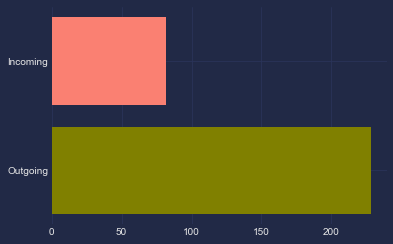

In [58]:
plt.barh(range(len(product_support)), list(product_support.values()), align='center',color=['olive', 'salmon'])
plt.yticks(range(len(product_support)), list(product_support.keys()))


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
It honestly seems like each branch has their strengths and weaknesses. North Branch has less people, so they may seem like they are less efficient, but the north branch has less incoming wait time, during call wait time, and less busy minutes. To me this indicates that they were getting to the calls faster. I think it would be useful to know if the customers problems were resolved during the calls.The south did beat the north on abdandoned calls however. There are a few more reps in the south branch so more could answer calls. 

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The 
The north branch would benefit from a few more reps just to get that abandonment rate a little lower. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: 
I wish I knew if customers issues were resolved. That would give me a better idea of which branch actually does a better job. Just because the north branch has less people, doesnt indicate they are the top branch. 

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [60]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: